Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [20]:
system('conda env list | grep data730', intern = TRUE)

[1] "data730               *  /home/studio-lab-user/.conda/envs/data730"

In [1]:
library('tidymodels')
library('readr')
library('moderndive')

Warning message:
‚ÄúYour system is mis-configured: ‚Äò/var/db/timezone/localtime‚Äô is not a symlink‚Äù
Warning message:
‚Äú‚Äò/var/db/timezone/localtime‚Äô is not identical to any known timezone file‚Äù
‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidymodels 1.2.0 ‚îÄ‚îÄ

‚úî broom        1.0.6     ‚úî recipes      1.1.0
‚úî dials        1.2.1     ‚úî rsample      1.2.1
‚úî dplyr        1.1.4     ‚úî tibble       3.2.1
‚úî ggplot2      3.5.1     ‚úî tidyr        1.3.1
‚úî infer        1.0.7     ‚úî tune         1.2.1
‚úî modeldata    1.4.0     ‚úî workflows    1.1.4
‚úî parsnip      1.2.1     ‚úî workflowsets 1.1.0
‚úî purrr        1.0.2     ‚úî yardstick    1.3.1

‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidymodels_conflicts() ‚îÄ‚îÄ
‚úñ purrr::discard() masks scales::discard()
‚úñ dplyr::fi

We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [2]:
hate_crimes <- read_csv('hate_crimes - hate_crimes.csv')

hate_crimes |> # glimpse()
    select(hs, income, urbanization) |> skim()

Rows: 51 Columns: 9
‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Delimiter: ","
chr (5): state, median_house_inc, trump_support, unemployment, urbanization
dbl (4): share_pop_metro, hs, hate_crimes, income

‚Ñπ Use `spec()` to retrieve the full column specification for this data.
‚Ñπ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in skim(select(hate_crimes, hs, income, urbanization)): could not find function "skim"


Next, let‚Äôs add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for ‚Äúlow‚Äù, one for ‚Äúhigh‚Äù).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

Warning message:
‚ÄúRemoved 3 rows containing non-finite outside the scale range
(`stat_parallel_slopes()`).‚Äù
Warning message:
‚ÄúRemoved 3 rows containing missing values or values outside the scale range
(`geom_point()`).‚Äù


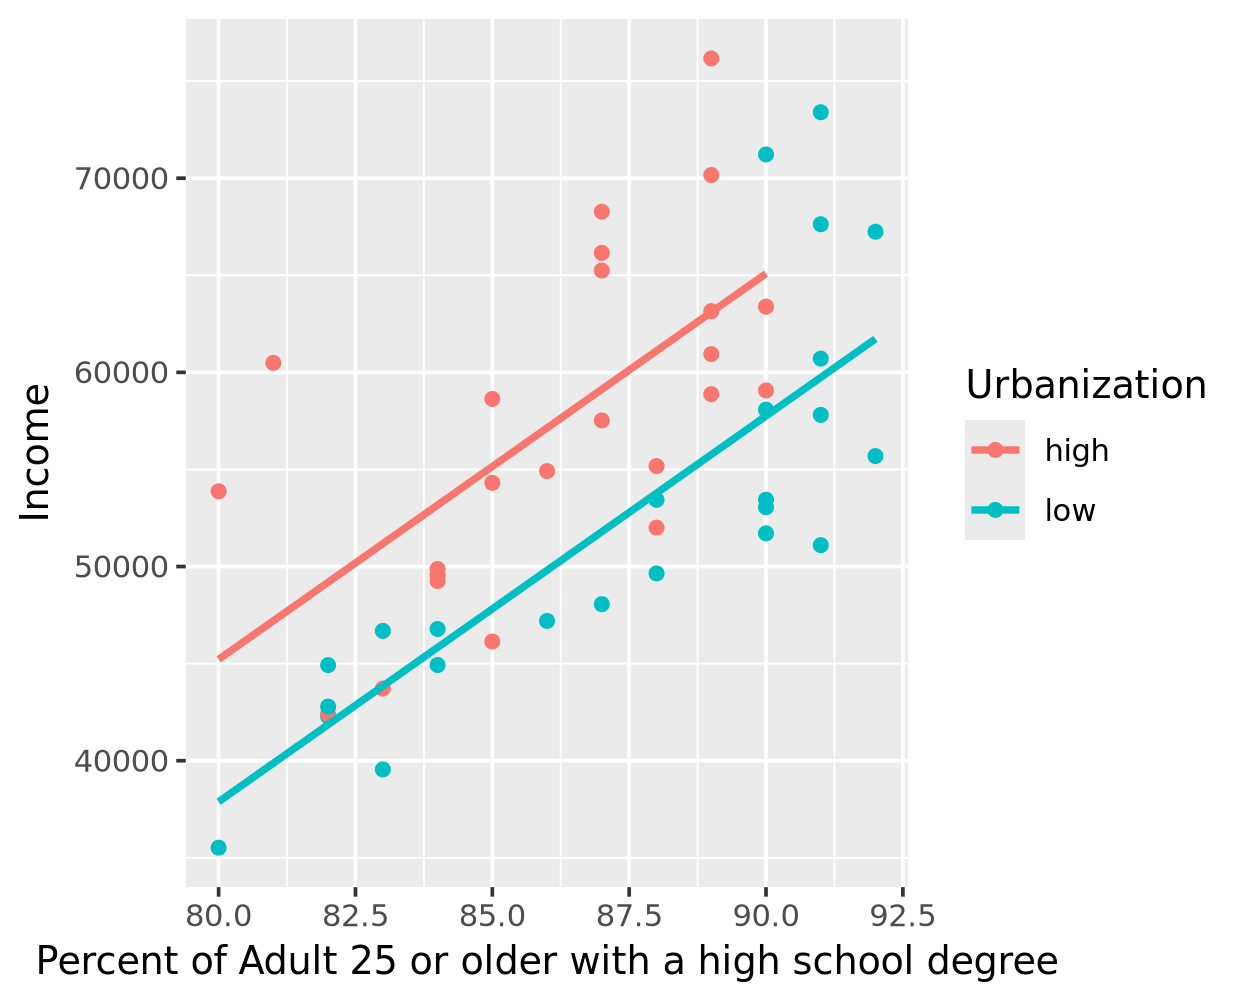

In [5]:
ggplot(data = hate_crimes, mapping = aes(x = hs, y = income, color = urbanization)) + geom_point() + 
    labs(x = "Percent of Adult 25 or older with a high school degree", y = 'Income', color = 'Urbanization') +
    geom_parallel_slopes(se = FALSE)

‚ùìWhich regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

In [9]:
urbanization_model <- lm(income ~ hs + urbanization, data = hate_crimes)
get_regression_table(urbanization_model)

term              estimate    std_error statistic p_value lower_ci   
1 intercept         -113725.193 23552.919 -4.828    0       -161163.206
2 hs                   1986.794   272.930  7.279    0          1437.084
3 urbanization: low   -7333.326  1857.659 -3.948    0        -11074.843
  upper_ci  
1 -66287.180
2   2536.504
3  -3591.808

Now let‚Äôs create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code your scatter plot in the cell below.**

‚ùìBased on visually comparing the two models shown above, do you think it would be best to run a ‚Äúparallel slopes‚Äù model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex ‚Äúinteraction model‚Äù (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ‚ùóÔ∏èSave the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ‚ùóÔ∏èSave the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [ ]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

In [ ]:
# non-parallel slopes model

# ‚ùóÔ∏è you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...





The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

üé∂ Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [ ]:
glance(ps_mod)

‚ùìCompare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

‚ùìUsing your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

‚ùìFor every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**